In [1]:
#Importacion de librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
#Lectura de datos
Data1 = pd.read_csv('winequality-red.csv')
Data1.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
Data1.shape

(1599, 12)

In [4]:
#Descripcion de los datos
Data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Data1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

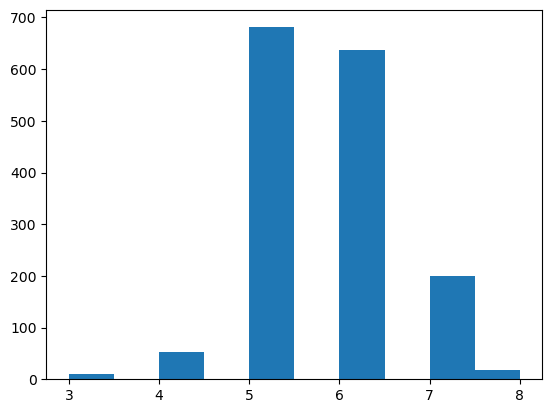

In [6]:
plt.hist(Data1.quality)

<Axes: xlabel='alcohol', ylabel='density'>

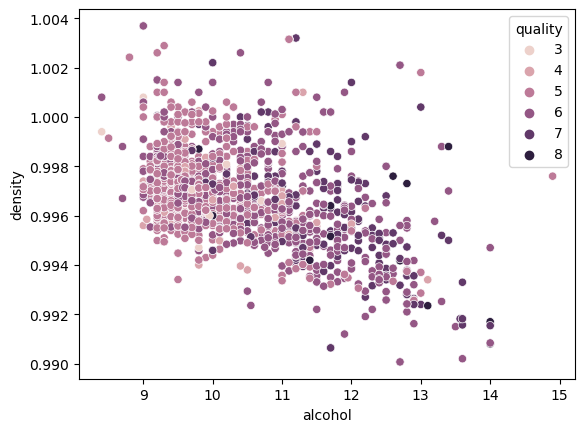

In [7]:
sns.scatterplot(x = "alcohol", y = "density", hue = "quality", data = Data1)

In [8]:
predictors_col = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

target_col = ['quality']

In [9]:
predictors = Data1[predictors_col]
target = Data1[target_col]

In [10]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [12]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


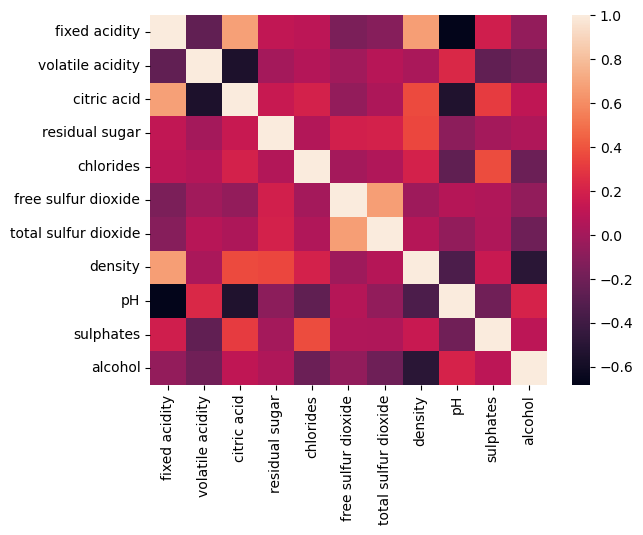

In [13]:
sns.heatmap(corr)
plt.show()

In [14]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [15]:
tree = DecisionTreeClassifier()

In [16]:
arbol = tree.fit(X_train, y_train)

[Text(0.4900864985064474, 0.9791666666666666, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.23789214997633976, 0.9375, 'x[9] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.038566189518514135, 0.8958333333333334, 'x[1] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.020821010292203953, 0.8541666666666666, 'x[2] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.01703537205725778, 0.8125, 'x[9] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.013249733822311606, 0.7708333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.020821010292203953, 0.7708333333333334, 'x[0] <= 8.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.01703537205725778, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.024606648527150124, 0.7291666666666666, 'gini = 0.0\nsamples = 1\n

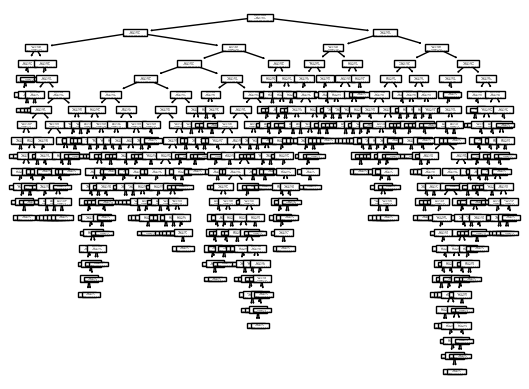

In [17]:
plot_tree(arbol)


In [18]:
predicciones = arbol.predict(X_test)
predicciones

array([7, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 7, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 7, 5, 5, 5, 7, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 7, 5, 5, 7, 7,
       6, 7, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 4, 7, 5, 6, 6, 5, 6, 5, 7, 6, 5, 5, 7, 5, 5, 6, 5, 7,
       7, 6, 6, 6, 5, 6, 6, 7, 4, 7, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       7, 7, 5, 5, 7, 5, 6, 7, 5, 5, 6, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 7, 6, 4, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7,
       5, 5, 7, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 5, 6, 6, 7, 7, 6, 7, 4, 6, 4, 5,
       6, 5, 6, 7, 6, 5, 7, 4, 5, 5, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 7, 4,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7,

In [19]:
y_test

,quality
912,6
1391,5
486,5
812,5
980,6
...,...
28,5
1175,6
957,6
799,6


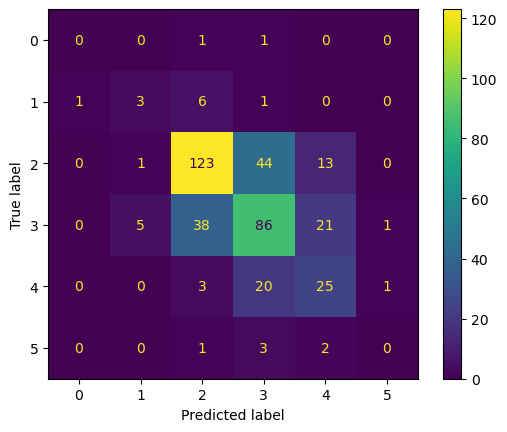

In [20]:
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [21]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5925